In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
bank = pd.read_csv("bank-full.csv",';')
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.shape


(45211, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
X = bank.loc[:,['job','education','housing','loan','balance','duration','month','age']]
Y = bank.y

In [7]:
enc = LabelEncoder()
X.housing= enc.fit_transform(X.housing)
X.loan= enc.fit_transform(X.loan)
X.education = enc.fit_transform(X.education)
X.job = enc.fit_transform(X.job)
X.month= enc.fit_transform(X.month)


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state = 10)

In [20]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)


X_train (31647, 8)
X_test (13564, 8)
Y_train (31647,)
Y_test (13564,)


In [21]:
model= LogisticRegression()
model.fit(X_train,Y_train)
Y_predict= model.predict(X_test)

C:\Users\Lenovo PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
accuracy_score(Y_test,Y_predict)



0.8890445296372751

In [23]:
confusion_matrix(Y_test,Y_predict)

array([[11787,   219],
       [ 1286,   272]], dtype=int64)

In [13]:
pd.crosstab(Y_test,Y_predict)

col_0,no,yes
y,,
no,11816,231
yes,1252,265


In [24]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     12006
         yes       0.55      0.17      0.27      1558

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



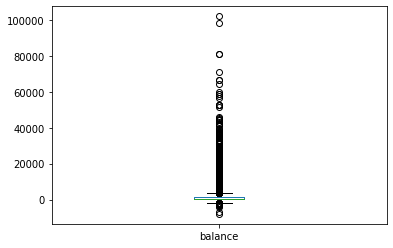

In [15]:
bank.balance.plot(kind = "box")

In [16]:
bank_balanceoutlier_removed=bank.drop(index=16000)
bank_balanceoutlier_removed.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


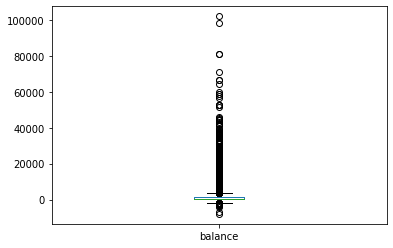

In [17]:
bank.balance.plot(kind = "box")


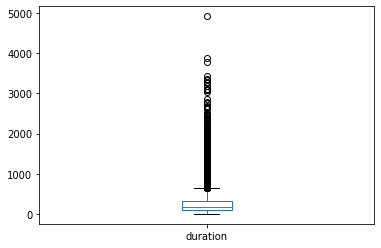

In [18]:
bank.duration.plot(kind = "box")